# Maximum likelihood estimation

## 1

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import scipy.optimize as opt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load income data
df1 = pd.read_csv('data/incomes.txt',sep=' ', header=None, names=["income"])
df1.head()

,income
0,51253.497156
1,100630.320241
2,83009.276137
3,82882.106543
4,77338.294839


### a) Histogram

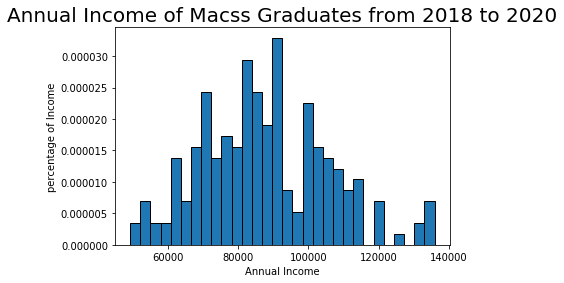

In [3]:
num_bins = 30
plt.hist(df1["income"],num_bins,density=True,edgecolor = "k")
plt.title('Annual Income of Macss Graduates from 2018 to 2020', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('percentage of Income')
plt.show()

### b) lognormal PDF

In [4]:
# Define a function that generating lognormal pdf
def trunc_lognorm_pdf(x, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None': 
        prob_notcut = 1.0 
    elif cut_ub == 'None' and cut_lb != 'None': 
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu)) 
    elif cut_ub != 'None' and cut_lb == 'None': 
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu)) 
    elif cut_ub != 'None' and cut_lb != 'None': 
        prob_notcut = sts.lognorm.cdf(cut_ub, s=sigma, scale=np.exp(mu)) -\
                      sts.lognorm.cdf(cut_lb, s=sigma, scale=np.exp(mu)) 
    pdf_vals = ((1/(x*sigma * np.sqrt(2 * np.pi)) * np.exp( -(np.log(x)-mu)**2 /(2*sigma**2))) / prob_notcut) 
    return pdf_vals

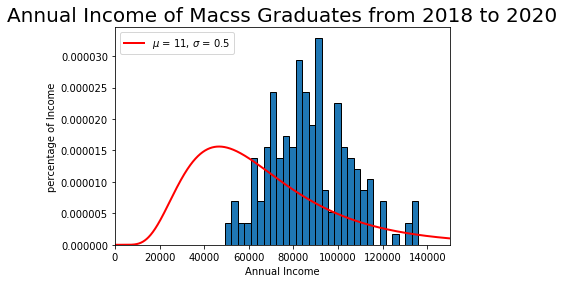

In [5]:
xvals = np.linspace(0,150000,3000)
mu = 11
sigma = 0.5
num_bins = 30
plt.hist(df1["income"],num_bins,density=True,edgecolor = "k")
plt.title('Annual Income of Macss Graduates from 2018 to 2020', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('percentage of Income')
plt.xlim([1e-10, 150000])
plt.plot(xvals, trunc_lognorm_pdf(xvals, mu, sigma, 1e-10, 150000),
         linewidth=2,color="r",label='$\mu$ = 11, $\sigma$ = 0.5')
plt.legend(loc="upper left")
plt.show()

In [7]:
# Return the log likelihood value

def log_like_trunc_lognorm(xvals, mu, sigma, cut_lb, cut_ub):
    
    pdf_vals = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return float(log_lik_val)

log_mle = log_like_trunc_lognorm(df1, 11, 0.5, 1e-10, 150000)
print('Log-likelihood: ', log_mle)

Log-likelihood:  -2379.120591931827


### c) 

In [8]:
def crit(params,xvals):
    mu,sigma = params
    log_like_val = log_like_trunc_lognorm(xvals, mu, abs(sigma), 1e-10, 150000)
    return -log_like_val

In [9]:
mu0 = 11
sigma0 = 0.5
params0 = np.array([mu0,sigma0])
result = opt.minimize(crit, params0, df1)
mu_mle, sigma_mle = result.x
print(result)

      fun: 2240.934337511636
 hess_inv: array([[ 2.05516896e-04, -1.58272274e-05],
       [-1.58272274e-05,  9.92889787e-05]])
      jac: array([3.05175781e-05, 6.10351562e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 276
      nit: 11
     njev: 66
   status: 2
  success: False
        x: array([11.36169997,  0.21174326])


In [10]:
print("MLE estimation for $\mu:", mu_mle)
print("MLE estimation for $\sigma:", sigma_mle)
log_mle = log_like_trunc_lognorm(df1, mu_mle, sigma_mle, 1, 150000)
print('Log-likelihood: ', log_mle)
hes_mle = result.hess_inv
print('The inverse Hessian matrix: ', hes_mle)

MLE estimation for $\mu: 11.361699965967007
MLE estimation for $\sigma: 0.21174326386681536
Log-likelihood:  -2240.934337511636
The inverse Hessian matrix:  [[ 2.05516896e-04 -1.58272274e-05]
 [-1.58272274e-05  9.92889787e-05]]


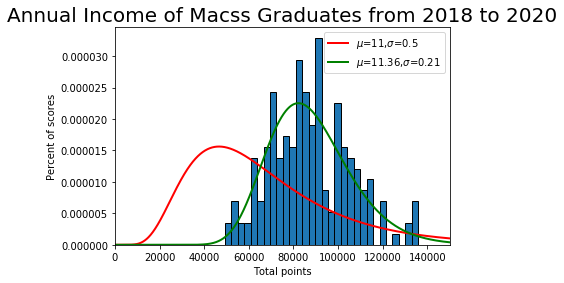

In [11]:
# Plot the histogram of the data
plt.title('Annual Income of Macss Graduates from 2018 to 2020', fontsize=20)
plt.xlabel('Total points')
plt.ylabel('Percent of scores')
plt.xlim([1e-10, 150000]) 

# Plot the two test distributions from before
plt.hist(df1["income"],num_bins,density=True,edgecolor = "k")
plt.plot(xvals, trunc_lognorm_pdf(xvals, mu0, sigma0, 1e-10, 150000),
         linewidth=2, color='r', label='$\mu$=11,$\sigma$=0.5')
plt.legend(loc='upper right')
plt.plot(xvals, trunc_lognorm_pdf(xvals, mu_mle, sigma_mle, 1e-10, 150000),
         linewidth=2, color='g', label='$\mu$=11.36,$\sigma$=0.21')
plt.legend(loc='upper right')

### d) Likelihood ratio test

In [12]:
mu_h0, sigma_h0 = mu0, sigma0
log_like_h0 = log_like_trunc_lognorm(df1, mu_h0, sigma_h0, 1e-10, 150000)
log_like_mle = log_like_trunc_lognorm(df1, mu_mle, sigma_mle, 1e-10, 150000)
log_ratio = 2 * (log_like_mle - log_like_h0)
pval_h0 = 1 - sts.chi2.cdf(log_ratio,2)
print("The null hypothesis value log likelihood =", log_like_h0)
print("MLE log likelihood =", log_like_mle)
print("Likelihood ratio =", log_ratio)
print("Chi squared of null hypothesis: p value =", pval_h0)

The null hypothesis value log likelihood = -2379.120591931827
MLE log likelihood = -2240.934337511636
Likelihood ratio = 276.3725088403826
Chi squared of null hypothesis: p value = 0.0


Because the p value is 0, then we can reject the null hypothesis that the actual data cines from lognorm distribution where $\mu = 11$, and $\sigma = 0.5$.

### e) Probability of earnings

In [13]:
p1 = 1 - sts.lognorm.cdf(100000,s=sigma_mle,scale=np.exp(mu_mle))
print("The probability of earning more than $100000 is: ", p1)
p2 = sts.lognorm.cdf(75000,s=sigma_mle,scale=np.exp(mu_mle))
print("The probability of earning less than $75000 is: ", p2)

The probability of earning more than $100000 is:  0.23755400684543593
The probability of earning less than $75000 is:  0.2596439369860366


## 2

In [14]:
df2 = pd.read_csv('data/sick.txt',sep=',', skiprows = 1, names=["sick","age","children","avgtemp_winter"])
df2.head()

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


### a) 

In [15]:
# Define a function that generating norm pdf
def norm_pdf(xvals, mu, sigma):
    pdf_vals = (1/(abs(sigma) * np.sqrt(2 * np.pi))) * np.exp( - (xvals - mu)**2 / (2 * abs(sigma)**2))
    
    # replace those pdfs that are extremely to 0, set the value to be 1e-10
    pdf_vals[pdf_vals==0] = 1e-10
    return pdf_vals

In [16]:
# Define a function that calculates the likelihood value

def norm_like_vals(sick,age,child,temp,beta0,beta1,beta2,beta3,sigma):
    ep = sick-beta0-beta1*age-beta2*child-beta3*temp
    pdf_vals = norm_pdf(ep,0,sigma)
    log_pdf_vals = np.log(pdf_vals)
    log_like_val = log_pdf_vals.sum()
    
    return log_like_val

In [17]:
# Define a function of the criterion

def crit_new(params,*args):
    beta0,beta1,beta2,beta3,sigma = params
    sick,age,child,tempt = args
    log_mle = norm_like_vals(sick,age,child,temp,beta0,beta1,beta2,beta3,abs(sigma))
    
    return -log_mle

In [18]:
# Plug in values 

sick, age, child, temp = df2["sick"], df2["age"], df2["children"], df2["avgtemp_winter"]

# Estimation

# Initial guess
params_init = np.array([0.5,0,0,0,1])
mle_agrs_init = (sick, age, child, temp)
result = opt.minimize(crit_new, params_init, args = mle_agrs_init, method='L-BFGS-B')
beta0_mle,beta1_mle,beta2_mle,beta3_mle,sigma_mle = result.x
print("beta0 =",beta0_mle)
print("beta1 =",beta1_mle)
print("beta2 =",beta2_mle)
print("beta3 =",beta3_mle)
print("sigma =",sigma_mle)

beta0 = 0.2516447195089024
beta1 = 0.012933452060923634
beta2 = 0.40050116983802325
beta3 = -0.009991696135351539
sigma = 0.0030176823564735285


In [19]:
print(result)
print(result.hess_inv.todense())

      fun: -876.8650639228229
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.10678605, -3.93117716, -0.21115056, -3.77272045, -0.08803909])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 582
      nit: 46
   status: 0
  success: True
        x: array([ 0.25164472,  0.01293345,  0.40050117, -0.0099917 ,  0.00301768])
[[ 2.65087840e+02  7.48101664e+00 -7.44383507e+01 -1.06838763e+01
   5.18606133e+00]
 [ 7.48101664e+00  2.14065449e-01 -2.12637554e+00 -3.03054312e-01
   1.31769370e-01]
 [-7.44383507e+01 -2.12637554e+00  2.11277022e+01  3.01342966e+00
  -1.32596015e+00]
 [-1.06838763e+01 -3.03054312e-01  3.01342966e+00  4.31420234e-01
  -2.01696798e-01]
 [ 5.18606133e+00  1.31769370e-01 -1.32596015e+00 -2.01696798e-01
   1.81466109e-01]]


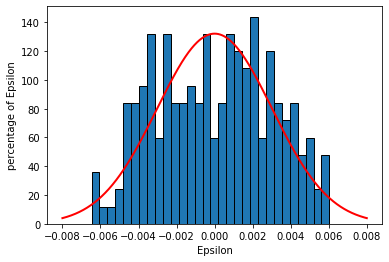

In [20]:
ep = sick- beta0_mle- age * beta1_mle - child * beta2_mle - temp * beta3_mle
plt.hist(ep,num_bins,density=True,edgecolor = "k")
pts = np.linspace(-0.008,0.008,1000)
plt.plot(pts,norm_pdf(pts,0,sigma_mle),linewidth=2,color='r',label='$\mu$ = 0, $\sigma$ = 0.003')
plt.xlabel('Epsilon')
plt.ylabel('percentage of Epsilon')
plt.show()

### b) Likelihood ratio test 

In [21]:
beta0_test,beta1_test,beta2_test,beta3_test,sigma_test = 1, 0, 0, 0, 0.1
sick, age, child, temp = df2["sick"], df2["age"], df2["children"], df2["avgtemp_winter"]
log_h0 = norm_like_vals(sick, age, child, temp,beta0_test,beta1_test,beta2_test,beta3_test,sigma_test)

print("The null hypothesis value log likelihood = ", log_h0)
log_mle = norm_like_vals(sick, age, child, temp,beta0_mle,beta1_mle,beta2_mle,beta3_mle,sigma_mle)
print("MLE log likelihood = ", -log_mle)
like_ratio = 2*(-log_mle - log_h0)
print("The likelihood ratio = ", like_ratio)
p_value = 1 - sts.chi2.cdf(like_ratio,5)
print("Chi squared p value = ", p_value)

The null hypothesis value log likelihood =  -2253.700688042125
MLE log likelihood =  -876.8650639228229
The likelihood ratio =  2753.671248238604
Chi squared p value =  0.0


Therefore, we will reject the null hypothesis that age, # of children, and average winter temprature have no effect on the number of sick days. The likelihood of the null hypothesis equals 0.